In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss, jaccard_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

UC3MAL201 Machine Learning Session 6 Activity sheet 6 Leon Eriksen Helgeland -
First written 01.09.2020

# Classification - Logistic Regression

## Objective
The aim of this activity sheet is to load a customer dataset belonging to a
telecommunication company and develop a classi7ier using the dataset. The overarching
objective of the model is to predict the churn rate. This kind of insight would enable the
company to take some pro-active steps and retain its existing customers. In a broader
sense this activity sheet is an application of machine learning in business analytics. The
classi7ication technique to be employed in this sheet is logistic regression.

In [11]:
dataset_file_name = 'dataset6.csv'
dataset_directory = 'dataset'

## TASK 1 (Data pre-processing)

In [12]:
dataframe = pd.read_csv(f'{dataset_directory}/{dataset_file_name}')
df = dataframe

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

In [14]:
df['churn'].value_counts()

0.0    142
1.0     58
Name: churn, dtype: int64

In [15]:
df.head(5)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [16]:
counter = 0
for column in df.columns:
    print(f'{counter}: {column}')
    counter+=1

0: tenure
1: age
2: address
3: income
4: ed
5: employ
6: equip
7: callcard
8: wireless
9: longmon
10: tollmon
11: equipmon
12: cardmon
13: wiremon
14: longten
15: tollten
16: cardten
17: voice
18: pager
19: internet
20: callwait
21: confer
22: ebill
23: loglong
24: logtoll
25: lninc
26: custcat
27: churn


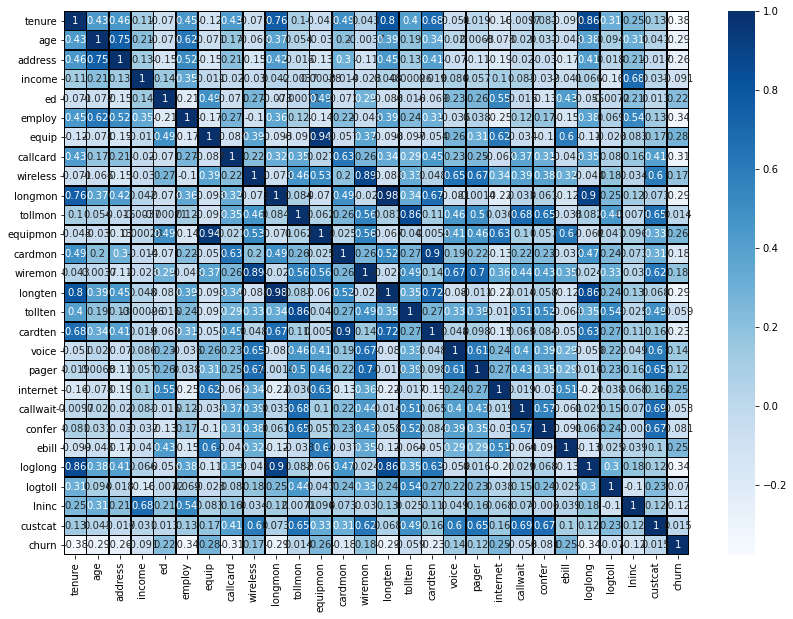

In [17]:
# some exploration
# 1 - Correlation of original dataframe
correlation = df.corr()
plt.subplots(figsize=(14, 10))
sns.heatmap(correlation, linecolor='black', linewidth=0.5, annot=True, cmap='Blues')

In [20]:
X = df[['tenure','employ','loglong','equip','equipmon','internet','ebill']]
y = df['churn']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.predict(X_test)[0:5]

array([1., 1., 0., 0., 0.])

In [26]:
clf.predict_proba(X_test)[0:5]

array([[0.23123373, 0.76876627],
       [0.19967388, 0.80032612],
       [0.81657299, 0.18342701],
       [0.59857097, 0.40142903],
       [0.85544587, 0.14455413]])

In [27]:
clf.score(X_test, y_test)

0.7333333333333333